In [1]:
# Import dependencies - run this first
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
import scipy
from scipy.integrate import simps
from numpy import trapz

ModuleNotFoundError: No module named 'rampy'

[73146]
73146
Mean baseline current:  -1.8154466954699997
Peak Current:  651.0892
Area:  19.94356668420395
Pulse Time:  50.25000000000013 milliseconds
Final current:  44.94989669547
[ 10.9411207   8.6483947   8.6483947   9.7947577  10.1768787  10.9411207
  10.5589997  10.9411207  12.8517267  13.6159667  14.3802067  14.3802067
  15.1444567  13.9980867  18.5835467  15.1444567  15.5265767  17.0550567
  15.9086967  18.5835467  18.2014267  17.4371767  18.5835467  19.3477867
  18.5835467  19.7299067  20.8762667  21.6405167  23.9332367  22.0226367
  20.4941467  24.3153567  23.9332367  24.3153567  27.3723267  28.1365667
  26.2259667  27.3723267  29.2829367  31.1935367  31.1935367  33.1041467
  33.8683867  36.9253567  40.7465667  38.8359667  38.0717167  43.8035367
  44.5677767  48.7711167  50.6817167  51.4459567  55.2671667  57.1777767
  60.2347467  63.2917167  69.4056567  71.6983767  77.4301967  80.1050467
  87.3653467  93.0971567  97.3004967 101.1217067 109.1462467 113.3495467
 117.1707467 12

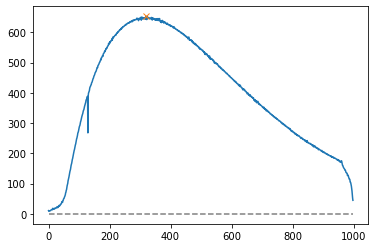

Number of local maxima:  1


In [14]:
# Extract metrics
a, b, c, d = np.loadtxt(filename, unpack=True)

# Define maximum
Imax = max(b)
# X position
peak_index = np.where(b==Imax) # Find index of max
peak_index = peak_index[0]
print(peak_index)
x_peak = a[peak_index[0]]
print(peak_index[0])
peak_index = int(peak_index[0])
# print(peak_index)

# Define noise
if x_peak > 0.5: 
    mean = np.mean(b[range(0, 10000)])
    noise = np.std(b[range(0, 10000)])
else: 
    mean = np.mean(b[range(50000, 60000)])
    noise = np.std(b[range(50000, 60000)])
    
print('Mean baseline current: ', mean)
b = np.subtract(b, mean)
# Define discharge region
discharge_index = []
for i in range(peak_index-10000, peak_index+20000):
    while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
        if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
            discharge_index = np.append(discharge_index, i)
        break
discharge_index = np.asfarray(discharge_index)
discharge_index = discharge_index.astype(int)
# print(discharge_index)
discharge_time = a[discharge_index]
discharge_current = b[discharge_index]

print("Peak Current: ", Imax)

# Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
area = trapz(discharge_current, dx=0.00005)
area_simps = simps(discharge_current, dx=0.00005)
print("Area: ", area)

# Calculate discharge time
pulseTime = max(discharge_time) - min(discharge_time)
print("Pulse Time: ", pulseTime*1000, 'milliseconds')

# Catch end current
I_Final = discharge_current[len(discharge_current)-1000]
print('Final current: ', I_Final)

from scipy.signal import find_peaks

print(discharge_current)
x = discharge_current
peaks, _ = find_peaks(x, height=0, distance=100, width=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

# Find number of peaks
peak_count = len(peaks)
print("Number of local maxima: ", peak_count)

Text(0, 0.5, 'Current (A)')

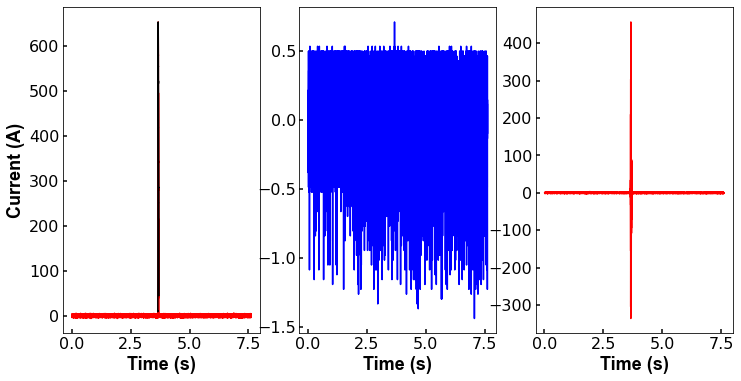

In [15]:
# Plot a single Raman spectrum

# Plot style
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=[12,6])
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax1.set_xlim(4, 6)
ax2.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax2.set_xlim(4, 6)
ax3.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax3.set_xlim(4, 6)

# Plot
ax1.plot(a, b, color='red')
ax1.plot(discharge_time, discharge_current, color='black')
ax2.plot(a, c, color='blue')
ax3.plot(a, d, color='red')

ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax2.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax3.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax1.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

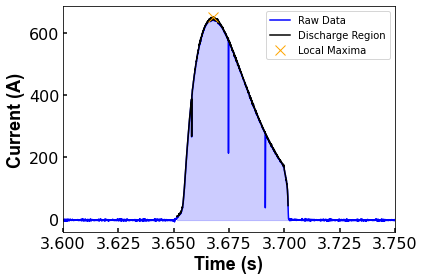

In [19]:
# Plot a single Raman spectrum
filename = txt_files[18]
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
ax.set_xlim(3.6, 3.75)

# Plot
ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend(loc='upper right')

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

In [8]:
# Snatch all text files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
txt_files = glob.glob("./*.txt")
print(txt_files)
print(len(txt_files))

['./13D_Data_135138P.txt', './2F_Data_101007P.txt', './7F_Data_102959P.txt', './pyro ash good 2_Data_103524P.txt', './mc 42_Data_114327P.txt', './Metcoke-8_Data_112844P.txt', './pa35_Data_122138P.txt', './sample9_Data_111151P.txt', './9C_Data_112921P.txt', './10C_Data_113536P.txt', './18D_Data_152257P.txt', './3F_Data_102312P.txt', './4C_Data_105136P.txt', './Metcoke-14_Data_145738P.txt', './MC 30_Data_122353P.txt', './MC 23_Data_124142P.txt', './Metcoke-12_Data_142719P.txt', './metcoke 4_Data_121345P.txt', './MC 33_Data_131228P.txt', './MC 24_Data_131816P.txt', './pa34_Data_113336P.txt', './MC 32_Data_125922P.txt', './pa30_Data_112530P.txt', './8E_Data_130004P.txt', './20C_Data_120952P.txt', './5D_Data_121616P.txt', './16C_Data_162855P.txt', './mc39_Data_124042P.txt', './mc 35_Data_115128P.txt', './MC 21_Data_120600P.txt', './6C_Data_110704P.txt', './MC 31_Data_122923P.txt', './3C_Data_104442P.txt', './7E_Data_124137P.txt', './7D_Data_123504P.txt', './MC 28_Data_125328P.txt', './pa36_

In [135]:
def process_ITcurve(filename):
    print(filename)
    # Extract metrics
    a, b, c, d = np.loadtxt(filename, unpack=True)
    
    # Define maximum
    Imax = max(b)
    # X position
    peak_index = np.where(b==Imax) # Find index of max
    peak_index = peak_index[0]
    x_peak = a[peak_index[0]]
    peak_index = int(peak_index[0])
    
    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    # Subtract the baseline current
    b = np.subtract(b, mean)
        
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break
    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    # area_simps = simps(discharge_current, dx=0.00005)
    # print("Area: ", area)
    # print(area_simps)
    
    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    # print("Pulse Time: ", pulseTime)
    
    # Catch end current
    I_Final = discharge_current[len(discharge_current)-70]

    from scipy.signal import find_peaks

    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    # Find number of peaks
    peak_count = len(peaks)

    # Assimilate
    current_stats = [Imax, np.mean(discharge_current), area, pulseTime, I_Final, peak_count]
    return current_stats

In [136]:
# Pull text files, assemble into statistics
big_stats = np.asarray([])

for i in range(0, len(txt_files)):
    filename = txt_files[i]
    stats = process_ITcurve(filename)
    stats = np.append(filename, stats)
    print(stats)
    if len(big_stats) == 0:
        big_stats = np.append(big_stats, stats)
    else:
        big_stats = np.vstack((big_stats, stats))
print(big_stats)

./13D_Data_135138P.txt
['./13D_Data_135138P.txt' '89.75323' '24.587943176292356'
 '4.4967289236265415' '0.6834999999999996' '10.601453346604' '1.0']
./2F_Data_101007P.txt
['./2F_Data_101007P.txt' '114.5911' '88.987416977716' '2.8909901494638843'
 '0.032849999999999824' '108.759561237716' '1.0']
./7F_Data_102959P.txt
['./7F_Data_102959P.txt' '87.4605' '38.286336605080216'
 '2.2564475709854284' '0.059550000000000214' '29.363373180992003' '2.0']
./pyro ash good 2_Data_103524P.txt
['./pyro ash good 2_Data_103524P.txt' '335.8392' '168.74659832798838'
 '13.954720740155825' '0.08314999999999984' '56.784880876356' '2.0']
./mc 42_Data_114327P.txt
['./mc 42_Data_114327P.txt' '393.5395' '94.72953696821513'
 '12.51334667215466' '0.13920000000000066' '10.604892431122' '1.0']
./Metcoke-8_Data_112844P.txt
['./Metcoke-8_Data_112844P.txt' '523.4607' '59.03366478002998'
 '21.81539195079434' '0.41635000000000044' '11.314797814802' '4.0']
./pa35_Data_122138P.txt
['./pa35_Data_122138P.txt' '298.0092' '189.

['./Metcoke-11_Data_161005P.txt' '561.2907' '208.92886192938522'
 '17.883811485127453' '0.0865499999999999' '13.612069058474' '1.0']
./8D_Data_124414P.txt
['./8D_Data_124414P.txt' '145.5429' '21.28960462538666'
 '11.94074550608624' '0.5798000000000001' '12.065629362773' '2.0']
./22C_Data_133032P.txt
['./22C_Data_133032P.txt' '170.3808' '38.3853313709341'
 '12.689660111727383' '0.3346' '20.543937068605' '2.0']
./17D_Data_161054P.txt
['./17D_Data_161054P.txt' '92.8102' '33.93162877072927'
 '11.14094270864915' '0.3312000000000026' '17.412262396128998' '3.0']
./6E_Data_122326P.txt
['./6E_Data_122326P.txt' '216.2353' '133.22376913552873'
 '3.0497004185454126' '0.022999999999999687' '216.21328466391302' '1.0']
./11C_Data_114107P.txt
['./11C_Data_114107P.txt' '88.60687' '25.431102091781042'
 '7.10860863682951' '0.28259999999999996' '14.074358057619' '2.0']
./23C_Data_121653P.txt
['./23C_Data_121653P.txt' '234.195' '66.10929123063478'
 '11.743640679156966' '0.17969999999999997' '51.90132930606

['./6D_Data_122242P.txt' '77.14323' '39.14666832521003'
 '4.166680243353932' '0.10709999999999997' '15.956996793504999' '3.0']
./mc38_Data_105907P.txt
['./mc38_Data_105907P.txt' '196.365' '136.895393849675'
 '3.927487541543189' '0.02895000000000003' '187.54971384967502' '1.0']
./PA10_Data_120625P.txt
['./PA10_Data_120625P.txt' '316.7332' '150.8011112485493'
 '12.613859719969216' '0.08414999999999928' '42.679110438627' '1.0']
./6F_Data_103612P.txt
['./6F_Data_103612P.txt' '134.4614' '89.27455630374884'
 '3.909745058352425' '0.04400000000000004' '38.842424535484' '1.0']
./17C_Data_163714P.txt
['./17C_Data_163714P.txt' '290.3668' '31.944407374867097'
 '15.245016469716532' '0.48309999999999986' '16.68141977581' '1.0']
./30C_Data_131001P.txt
['./30C_Data_131001P.txt' '396.2144' '42.942098948674264'
 '18.724418920674456' '0.45394999999999985' '9.093336399196' '3.0']
./pa31_Data_112017P.txt
['./pa31_Data_112017P.txt' '401.5641' '79.09896253913946'
 '19.533044690223967' '0.2538' '9.45535783049

In [139]:
# Create an Excel worksheet
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('IT_Features_All.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Write some data headers.
worksheet.write('A1', 'Filename', bold)
worksheet.write('B1', 'Peak Current', bold)
worksheet.write('C1', 'Mean Current', bold)
worksheet.write('D1', 'Area Under Curve', bold)
worksheet.write('E1', 'Pulse Time', bold)
worksheet.write('F1', 'Final Current', bold)
worksheet.write('G1', 'Local Maxima', bold)

# Start from the first cell. Rows and columns are zero indexed.
row = 1
col = 0

for filename, Imax, Imean, Area, PulseTime, Ifinal, LocMax in (big_stats):
    worksheet.write(row, col, filename)
    worksheet.write(row, col+1, Imax)
    worksheet.write(row, col + 2, Imean)
    worksheet.write(row, col + 3, Area)
    worksheet.write(row, col + 4, PulseTime)
    worksheet.write(row, col + 5, Ifinal)
    worksheet.write(row, col + 6, LocMax)
    row += 1
    
workbook.close()

In [1]:
print('done')

done
